In [1]:
%reset
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
% cd /work/eay/OM4_rerun2/20030101.nc/
fs=xr.open_dataset('20030101.ocean_static_no_mask_table.nc')
lon=fs['geolon']; lat=fs['geolat']
lonu=fs['geolon_u']; latu=fs['geolat_u']
lonv=fs['geolon_v']; latv=fs['geolat_v']
print(fs)


/work2/eay/OM4_rerun2/20030101.nc
<xarray.Dataset>
Dimensions:    (time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * xh         (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh         (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * time       (time) object 1900-01-01 00:00:00
  * xq         (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yq         (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
Data variables:
    areacello  (yh, xh) float32 ...
    geolon     (yh, xh) float32 ...
    geolat     (yh, xh) float32 ...
    geolon_c   (yq, xq) float32 ...
    geolat_c   (yq, xq) float32 ...
    geolon_u   (yh, xq) float32 ...
    geolat_u   (yh, xq) float32 ...
    geolon_v   (yq, xh) float32 ...
    geolat_v   (yq, xh) float32 ...
    wet        (yh, xh) float32 ...
    wet_c      (yq, xq) float32 ...
    wet_u      (yh, xq) float32 ...
    wet_v      (yq, xh) float32 ...
    dxt        (yh, xh) flo

In [3]:
title='2003-12-17' #J16 F15 M17 A16 M17 J15 Jy15 A17 S18 O N D17
data1=xr.open_dataset('20030101.ocean_5daily.nc').sel(time=title)
#print(data1)
salt=data1['so'].isel(zl=0)
temp=data1['thetao'].isel(zl=0)
MLD=data1['MLD_003']
xq=data1['xq']
yq=data1['yq']
depth=data1['depth_ocean']


print(data1)

<xarray.Dataset>
Dimensions:           (time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080, zi: 76, zl: 75)
Coordinates:
  * xh                (xh) float64 -299.7 -299.5 -299.2 ... 59.53 59.78 60.03
  * yh                (yh) float64 -80.39 -80.31 -80.23 ... 89.73 89.84 89.95
  * time              (time) object 2003-12-17 00:00:00
  * zl                (zl) float64 1.0 3.0 5.0 ... 3.338e+03 3.591e+03 5.111e+03
  * xq                (xq) float64 -299.6 -299.3 -299.1 ... 59.66 59.91 60.16
  * yq                (yq) float64 -80.35 -80.27 -80.19 ... 89.78 89.89 90.0
  * zi                (zi) float64 0.0 2.0 4.0 ... 3.461e+03 3.722e+03 6.5e+03
Data variables:
    zos               (time, yh, xh) float32 ...
    thetao            (time, zl, yh, xh) float32 ...
    so                (time, zl, yh, xh) float32 ...
    uh                (time, zl, yh, xq) float32 ...
    vh                (time, zl, yq, xh) float32 ...
    e                 (time, zi, yh, xh) float32 ...
    MLD_003           (ti

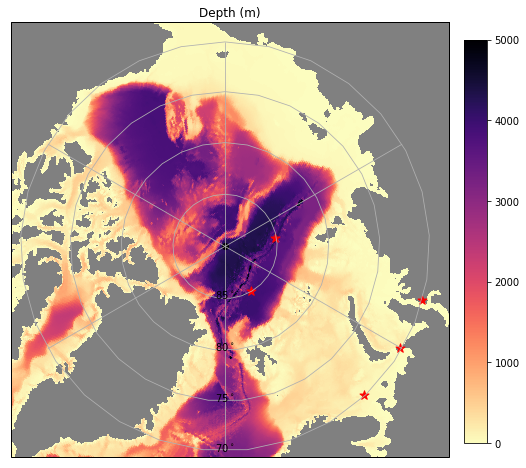

In [4]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))


ax.set_extent([-180, 180, 68, 90],ccrs.PlateCarree())
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,depth,transform=ccrs.PlateCarree(),vmin=0,vmax=5000,cmap='magma_r');
plt.colorbar(cax=ax1)
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Depth (m)')
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])
ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())

ax.scatter(lon[1056,1153], lat[1056,1153], marker='*',s=90,c='red', transform=ccrs.PlateCarree())
ax.scatter(lon[1050,296], lat[1050,296], marker='*',s=90,c='red', transform=ccrs.PlateCarree())
ax.scatter(lon[974,1349], lat[974,1349], marker='*',s=90,c='red', transform=ccrs.PlateCarree())
ax.scatter(lon[1078,1377], lat[1078,1377], marker='*',s=90,c='red', transform=ccrs.PlateCarree())

ax.scatter(lon[983,84], lat[983,84], marker='*',s=90,c='red', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

In [6]:
print(lon.shape)
dummy = lon*0.0


(1080, 1440)


In [137]:
#Upper left
coords=dummy.where(lat>85).where(lat<85.25).where(lon>30).where(lon<30.25)
np.where(~np.isnan(coords))

(array([1056, 1057]), array([1153, 1150]))

In [148]:
#Upper right
coords=dummy.where(lat>85).where(lat<85.25).where(lon>-260.25).where(lon<-260)
np.where(~np.isnan(coords))

(array([1050]), array([296]))

In [149]:
#Lower left
coords=dummy.where(lat>70).where(lat<70.25).where(lon>43.).where(lon<43.25)
np.where(~np.isnan(coords))

(array([974, 975, 976, 977]), array([1349, 1349, 1348, 1348]))

In [140]:
#Lower middle
coords=dummy.where(lat>70).where(lat<70.25).where(lon>59.75).where(lon<60.)
np.where(~np.isnan(coords))

(array([1078, 1078, 1079, 1079]), array([1377, 1378, 1377, 1378]))

In [153]:
#Lower right
coords=dummy.where(lat>70).where(lat<70.25).where(lon>-285.25).where(lon<-285)
np.where(~np.isnan(coords))

(array([983, 984, 985, 985]), array([84, 85, 85, 86]))